In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

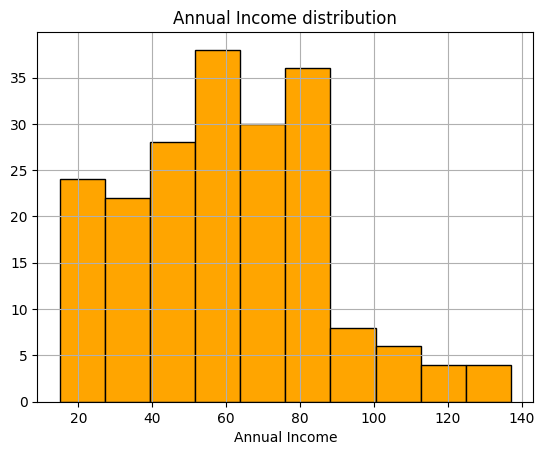

In [35]:
plt.plot(figsize=(8,5))
plt.hist(df["Annual Income (k$)"], color='orange', edgecolor='k')
plt.title("Annual Income distribution")
plt.xlabel("Annual Income")
plt.grid(True)
plt.show


In [36]:
df.select_dtypes(include=['number']).corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

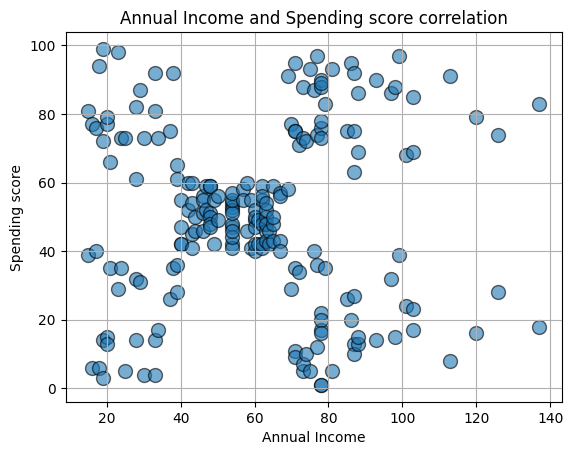

In [37]:
plt.plot(figsize=(8,5))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], edgecolor='k', alpha=0.6, s=100)
plt.title("Annual Income and Spending score correlation")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.grid(True)
plt.show

In [38]:
# a) Data Pre-processing
# Select relevant features for clustering (e.g., Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# b) Data Preparation (Train-Test Split - Not strictly needed for unsupervised learning)
# Splitting is not crucial for clustering, but it can be useful to evaluate the cluster stability
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [40]:
# c) Apply Machine Learning Algorithms

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)
kmeans_labels_train = kmeans.labels_
kmeans_labels_test = kmeans.predict(X_test)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels_train = agg_clustering.fit_predict(X_train)
agg_labels_test = agg_clustering.fit_predict(X_test)

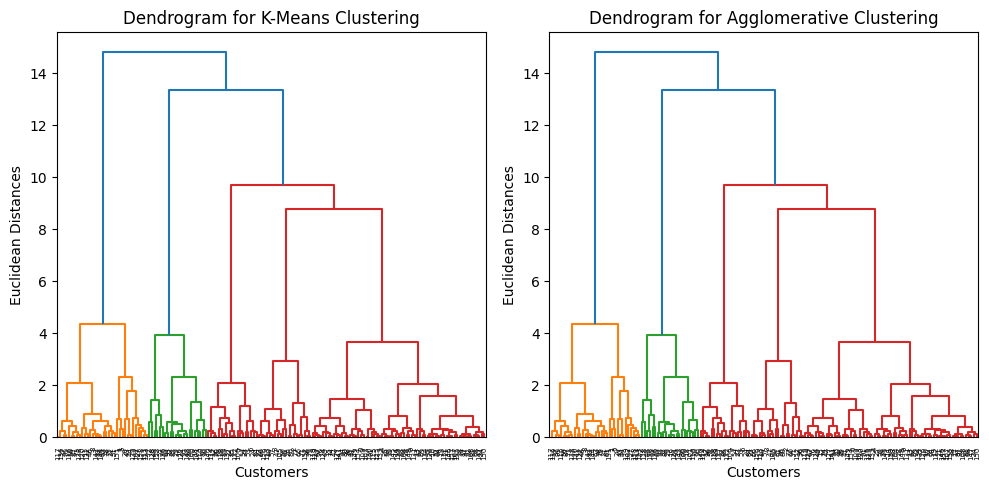

In [41]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))

#dendrogram for K-Means
plt.subplot(1, 2, 1)
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward')) # You can change the linkage method
plt.title('Dendrogram for K-Means Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

#dendrogram for Agglomerative Clustering
plt.subplot(1, 2, 2)
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))  # You can change the linkage method
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.tight_layout()
plt.show()

In [42]:
# d) Evaluate Model (Silhouette Score)

# Silhouette score for KMeans
kmeans_silhouette_train = silhouette_score(X_train, kmeans_labels_train)
kmeans_silhouette_test = silhouette_score(X_test, kmeans_labels_test)
print(f"K-Means Silhouette Score (Train): {kmeans_silhouette_train:.3f}")
print(f"K-Means Silhouette Score (Test): {kmeans_silhouette_test:.3f}")

# Silhouette score for Agglomerative Clustering
agg_silhouette_train = silhouette_score(X_train, agg_labels_train)
agg_silhouette_test = silhouette_score(X_test, agg_labels_test)
print(f"Agglomerative Silhouette Score (Train): {agg_silhouette_train:.3f}")
print(f"Agglomerative Silhouette Score (Test): {agg_silhouette_test:.3f}")


K-Means Silhouette Score (Train): 0.551
K-Means Silhouette Score (Test): 0.567
Agglomerative Silhouette Score (Train): 0.552
Agglomerative Silhouette Score (Test): 0.608


In [43]:

# Cross-validation for KMeans
kmeans_cv_scores = cross_val_score(kmeans, X_scaled, kmeans.fit_predict(X_scaled), cv=5) # Using the fitted labels from the whole dataset
print(f"K-Means Cross-Validation Scores: {kmeans_cv_scores}")
print(f"K-Means Average Cross-Validation Score: {kmeans_cv_scores.mean():.3f}")



K-Means Cross-Validation Scores: [-114.61015203  -19.40806142  -13.05475539  -35.32026001  -50.23291398]
K-Means Average Cross-Validation Score: -46.525
